In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



file = open("btcdata.csv","r")

day = []
price = []
for line in file:
    l = line.strip("\n").split(",")
    day.append(l[0])
    price.append(float(l[1]))
    

In [3]:
table = pd.Series(price,day,name='article_id')

In [4]:
table  ## data from https://www.coindesk.com/price/

1-Jan-17       997.69
2-Jan-17      1018.05
3-Jan-17      1030.82
4-Jan-17      1129.87
5-Jan-17      1005.81
6-Jan-17       895.67
7-Jan-17       905.17
8-Jan-17       913.52
9-Jan-17       899.35
10-Jan-17      904.79
11-Jan-17      775.98
12-Jan-17      802.83
13-Jan-17      826.12
14-Jan-17      818.64
15-Jan-17      822.42
16-Jan-17      830.26
17-Jan-17      904.45
18-Jan-17      884.25
19-Jan-17      898.02
20-Jan-17      891.62
21-Jan-17      920.01
22-Jan-17      925.33
23-Jan-17      912.69
24-Jan-17      885.65
25-Jan-17      894.11
26-Jan-17      915.10
27-Jan-17      918.56
28-Jan-17      920.28
29-Jan-17      914.04
30-Jan-17      920.24
               ...   
21-Jan-18    11522.86
22-Jan-18    10772.15
23-Jan-18    10839.83
24-Jan-18    11399.52
25-Jan-18    11137.24
26-Jan-18    11090.06
27-Jan-18    11407.15
28-Jan-18    11694.47
29-Jan-18    11158.39
30-Jan-18    10035.00
31-Jan-18    10166.51
1-Feb-18      9052.58
2-Feb-18      8827.63
3-Feb-18      9224.39
4-Feb-18  

In [5]:
table.plot(title = 'BTC price in 2017',figsize = (15,8),fontsize = 12)

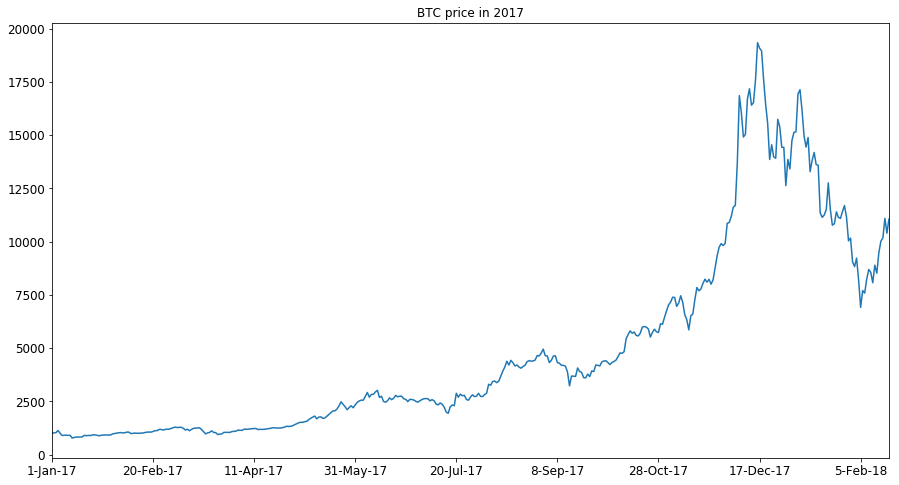

In [6]:
plt.show()

Basic Exponential Smoothing Experiment

S{t} =  αX{t} + (1 - α )S{t-1}.

s(T)  estimate of what the next value of x(T)

In [7]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def SSE(observe,forecast):
    s = 0;
    for i in range(1,len(observe)):
        s += (observe[i]-forecast[i-1])**2
    return s/(len(observe)-1)

In [8]:
sx = np.arange(0.5,1.3,0.05)

sy = [exponential_smoothing(price,float(e)) for e in sx] 

sz = [SSE(price,e) for e in sy] 

In [9]:
pd.Series(sz,sx)

0.50    284154.665945
0.55    265676.418425
0.60    250786.560552
0.65    238658.290134
0.70    228721.375236
0.75    220573.445575
0.80    213926.120971
0.85    208571.445691
0.90    204360.366041
0.95    201188.472996
1.00    198986.223928
1.05    197712.011713
1.10    197347.124299
1.15    197892.042710
1.20    199363.792445
1.25    201794.286366
dtype: float64

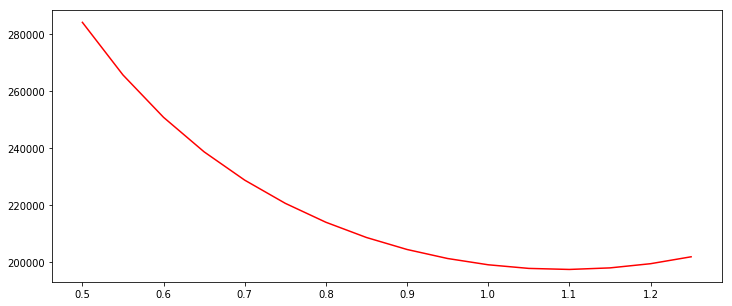

In [10]:
plt.figure(figsize=(12,5))
plt.plot(sx,sz, 'r-')
plt.show()

 -----------------------------------------------------------------------------------------------------------------------------
               Double Exponential Smoothing Experiment 
        
     ℓ{x}    = αy{x}+(1−α)(ℓ{x−1}+b{x−1})     level
     b{x}    = β(ℓ{x}−ℓ{x−1})+(1−β)b{x−1}     trend
     y'{x+1} = ℓ{x}+b{x}                      forecast  

In [11]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
          value = result[-1]
        else:
          value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [12]:
de = np.arange(0.05,1,0.05)
double_SE_table = pd.DataFrame(index = de)
double_SE_table.index.name = "Beta"
double_SE_table.columns.name = "Alpha"


for i in de:
    l = []
    for j in de:
        l.append(SSE(price,double_exponential_smoothing(price,i,j)))#
    double_SE_table[i] = l

In [13]:
double_SE_table

Alpha,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
Beta,,,,,,,,,,,,,,,,,,,
0.05,2.745094e+06,1.245741e+06,816333.938473,616389.843237,500171.533626,424470.402373,371832.507492,333559.844626,304749.542994,282446.741377,264798.358133,250606.693037,239075.727524,229662.143859,221986.575319,215780.161896,210851.848309,207067.851056,204338.288578
0.10,2.334691e+06,1.132443e+06,765174.948417,590227.371147,483935.961508,413042.409268,363411.687562,327389.908967,300382.697599,279539.032801,263067.860120,249828.392399,239078.210333,230320.860919,223215.616265,217524.740508,213082.592445,209777.076847,207537.966616
0.15,2.194189e+06,1.054791e+06,745552.074524,581417.114013,477524.469544,407621.149359,359107.642694,324406.150064,298697.824165,278981.090607,263423.750693,250907.676030,240735.960815,232458.354531,225772.826613,220472.011838,216414.372614,213508.237935,211702.278986
0.20,2.079798e+06,1.032592e+06,744966.387889,580478.409697,474663.576741,403875.267266,356021.938504,322679.371744,298356.173040,279773.086397,265059.027961,253153.005899,243434.634120,235519.208834,229152.720759,224161.317595,220427.818091,217880.467429,216486.690548
0.25,1.895156e+06,1.043777e+06,749185.047503,581854.908310,471203.012768,399316.418928,352920.748730,321619.951857,299020.842272,281644.104900,267700.153507,256275.032637,246876.509683,239208.883270,233073.275302,228328.924387,224880.345687,222673.441211,221693.537731
0.30,1.754077e+06,1.056171e+06,757558.528886,582077.603765,464821.912586,393496.594382,350112.175900,321622.481780,300943.927182,284674.189248,271294.482257,260140.169544,250889.783658,243345.978435,237359.820497,232814.736741,229629.398934,227762.879836,227217.008926
0.35,1.695324e+06,1.062102e+06,769693.782244,577358.859401,455155.357238,387400.408465,348538.298130,323259.492193,304356.408606,288859.619673,275707.233285,264559.155521,255277.740743,247750.078980,241857.043341,237489.421683,234569.357865,233064.234924,232991.967295
0.40,1.704625e+06,1.070461e+06,780613.707719,565811.064295,443668.078474,382508.931581,349040.584409,326844.186162,309234.206362,294000.448011,280677.363998,269277.658345,259823.543605,252249.309147,246433.961439,242255.080688,239628.059923,238525.976515,238985.081014
0.45,1.760659e+06,1.089458e+06,783951.724386,548363.478382,432529.236323,380020.469898,352043.297653,332342.453586,315308.571425,299751.785432,285880.547877,274034.646116,264336.316932,256712.377927,251003.502625,247055.226931,244770.110153,244128.690964,245191.533952


In [14]:
plotx = []
for i in range(19):
    for j in range(19):
        plotx.append(0.05+i*0.05)
        
ploty = []
for i in range(19):
    for j in range(19):
        ploty.append(0.05+j*0.05)
        
plotz = []
for i in range(19):
    for j in range(19):
        plotz.append(double_SE_table[0.05+i*0.05][0.05+j*0.05])
        
dataframe_for_plot = pd.DataFrame({"X":plotx,"Y":ploty,"Z":plotz})


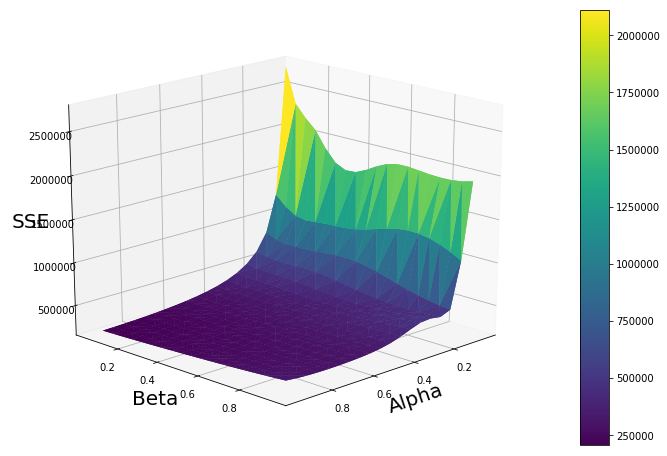

In [15]:
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax = fig2.gca(projection='3d')
ax.plot_trisurf(dataframe_for_plot['X'], dataframe_for_plot['Y'], dataframe_for_plot['Z'], cmap=plt.cm.viridis, linewidth=0.2)

 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(dataframe_for_plot['X'], dataframe_for_plot['Y'], dataframe_for_plot['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig2.colorbar( surf, aspect=15)


# Rotate it
ax.view_init(20, 45)

ax.set_xlabel('Alpha', fontsize=20)
ax.set_ylabel('Beta', fontsize=20)
ax.set_zlabel('SSE', fontsize=20)

plt.show()

 -----------------------------------------------------------------------------------------------------------------------------

##  Normalization
 change range from 500 - 19500 to 0 - 1

In [16]:
def normalize(x):
    x = (x - 500)/19000
    return x

In [17]:
normal_price = normalize(table.values)

In [18]:
normal_serie = pd.Series(index = table.index,data = normal_price )

In [19]:
normal_serie

1-Jan-17     0.026194
2-Jan-17     0.027266
3-Jan-17     0.027938
4-Jan-17     0.033151
5-Jan-17     0.026622
6-Jan-17     0.020825
7-Jan-17     0.021325
8-Jan-17     0.021764
9-Jan-17     0.021018
10-Jan-17    0.021305
11-Jan-17    0.014525
12-Jan-17    0.015938
13-Jan-17    0.017164
14-Jan-17    0.016771
15-Jan-17    0.016969
16-Jan-17    0.017382
17-Jan-17    0.021287
18-Jan-17    0.020224
19-Jan-17    0.020948
20-Jan-17    0.020612
21-Jan-17    0.022106
22-Jan-17    0.022386
23-Jan-17    0.021721
24-Jan-17    0.020297
25-Jan-17    0.020743
26-Jan-17    0.021847
27-Jan-17    0.022029
28-Jan-17    0.022120
29-Jan-17    0.021792
30-Jan-17    0.022118
               ...   
21-Jan-18    0.580151
22-Jan-18    0.540639
23-Jan-18    0.544202
24-Jan-18    0.573659
25-Jan-18    0.559855
26-Jan-18    0.557372
27-Jan-18    0.574061
28-Jan-18    0.589183
29-Jan-18    0.560968
30-Jan-18    0.501842
31-Jan-18    0.508764
1-Feb-18     0.450136
2-Feb-18     0.438296
3-Feb-18     0.459178
4-Feb-18  

In [20]:
synormal = [exponential_smoothing(normal_serie.values,float(e)) for e in sx] 
sznormal = [SSE(price,e) for e in sy] 

In [21]:
pd.Series(sznormal,sx)

0.50    284154.665945
0.55    265676.418425
0.60    250786.560552
0.65    238658.290134
0.70    228721.375236
0.75    220573.445575
0.80    213926.120971
0.85    208571.445691
0.90    204360.366041
0.95    201188.472996
1.00    198986.223928
1.05    197712.011713
1.10    197347.124299
1.15    197892.042710
1.20    199363.792445
1.25    201794.286366
dtype: float64

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go

In [23]:
trace = go.Scatter(
    x = table.index,
    y = table.values
)

data = [trace]

py.iplot(data, filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~chinyyyyyyyy/0 or inside your plot.ly account where it is named 'basic-line'


# NEWS OF BITCOIN 

In [24]:
NEWS_dataframe = pd.read_csv("News_BTC.csv")

In [25]:
NEWS_dataframe

,day,tag,title
0,1/1/2017,"bubble,fractal,Hype Cycle,market,MtGox,Price,p...","A Look At Bitcoin Bubbles, When Will the Next ..."
1,1/1/2017,"000,Bitcoin,bitcoin $1,bitcoin exchanges,Bitco...","Bitcoin Breaks $1,000 as Exchanges Break Volum..."
2,1/2/2017,"Bitcoin,Cloud quantum computing,Cryptography,D...",US Government Escalates Push for Post-Quantum ...
3,1/2/2017,"Bitcoin,Bitso,Mexico",Why Volume Is Exploding at Mexican Bitcoin Exc...
4,1/2/2017,"Bitcoin,Bitcoin startups,Commercial Marketing,...",The Bitcoin Constellation Is Bigger Than Most ...
5,1/2/2017,"Bitcoin Games,blackjack,Casino,craps,dice,Jack...",Bitcoin Games Paid 80 BTC in Jackpots Since Oc...
6,1/2/2017,"Academia,Bitcoin,Copyright,freedom of informat...",Academia Revolts Against Copyright with help f...
7,1/3/2017,"LocalBitcoins,Russia,Trading Volume,use cases,...","Localbitcoins’ Growth 85% 2016, Signaling Furt..."
8,1/3/2017,"Bitcoin,Genesis Block,Hal Finney,Jered Kenna,R...",Bitcoin’s Quirky Genesis Block Turns Eight Yea...
9,1/3/2017,"backups,FBI,Kaspersky Lab,Malware,ransom,ranso...",How to Protect Yourself From Ransomware


In [26]:
NEWS_dataframe['day']

0        1/1/2017
1        1/1/2017
2        1/2/2017
3        1/2/2017
4        1/2/2017
5        1/2/2017
6        1/2/2017
7        1/3/2017
8        1/3/2017
9        1/3/2017
10       1/3/2017
11       1/4/2017
12       1/4/2017
13       1/4/2017
14       1/5/2017
15       1/5/2017
16       1/5/2017
17       1/6/2017
18       1/6/2017
19       1/6/2017
20       1/6/2017
21       1/7/2017
22       1/7/2017
23       1/7/2017
24       1/7/2017
25       1/8/2017
26       1/8/2017
27       1/8/2017
28       1/8/2017
29       1/9/2017
          ...    
2796    2/15/2018
2797    2/16/2018
2798    2/16/2018
2799    2/16/2018
2800    2/16/2018
2801    2/16/2018
2802    2/16/2018
2803    2/16/2018
2804    2/16/2018
2805    2/17/2018
2806    2/17/2018
2807    2/17/2018
2808    2/17/2018
2809    2/17/2018
2810    2/17/2018
2811    2/17/2018
2812    2/17/2018
2813    2/18/2018
2814    2/18/2018
2815    2/18/2018
2816    2/18/2018
2817    2/18/2018
2818    2/18/2018
2819    2/18/2018
2820    2/

In [27]:
frequenzy = dict()
for i in NEWS_dataframe['day']:
    a = i.split("/")
    if not(a[2]+"/"+a[0] in frequenzy):
         frequenzy[a[2]+"/"+a[0]] = 1
    else:
        frequenzy[a[2]+"/"+a[0]] += 1

In [28]:
frequenzy

{'2017/1': 123,
 '2017/10': 249,
 '2017/11': 298,
 '2017/12': 375,
 '2017/2': 121,
 '2017/3': 128,
 '2017/4': 104,
 '2017/5': 128,
 '2017/6': 181,
 '2017/7': 170,
 '2017/8': 186,
 '2017/9': 170,
 '2018/1': 395,
 '2018/2': 198}

In [29]:
Frequenzy_of_Series = pd.Series(frequenzy)
Frequenzy_of_Series = Frequenzy_of_Series.reindex(['2017/1','2017/2','2017/3','2017/4','2017/5','2017/6','2017/7','2017/8','2017/9','2017/10','2017/11','2017/12','2018/1','2018/2'])


In [30]:
Frequenzy_of_Series.values
Frequenzy_of_Series.index

Index(['2017/1', '2017/2', '2017/3', '2017/4', '2017/5', '2017/6', '2017/7',
       '2017/8', '2017/9', '2017/10', '2017/11', '2017/12', '2018/1',
       '2018/2'],
      dtype='object')

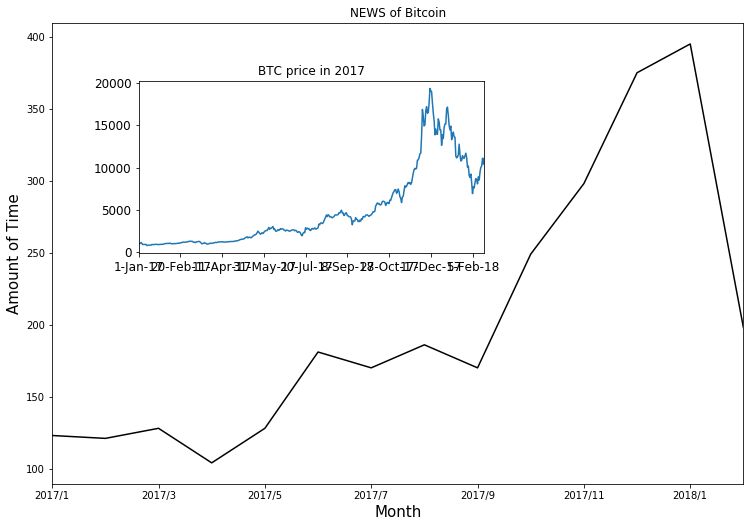

In [31]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes1 = Frequenzy_of_Series.plot(title = 'NEWS of Bitcoin',figsize=(12,6),color = 'k')

axes1.set_xlabel("Month",fontsize = 15)
axes1.set_ylabel("Amount of Time",fontsize = 15)
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
axes2 =  table.plot(title = 'BTC price in 2017',figsize = (12,8),fontsize = 12)

# Larger Figure Axes 

plt.show()

In [32]:
dict_tag = dict()

In [33]:
for i in range(len(NEWS_dataframe.index)):
    l = str(NEWS_dataframe['tag'][i]).lower().split(',')
    for j in l:
        if not(j in dict_tag):
            l = list()
            l.append((NEWS_dataframe['day'][i],NEWS_dataframe['title'][i]))
            dict_tag[j] = l
        else:
            dict_tag[j].append((NEWS_dataframe['day'][i],NEWS_dataframe['title'][i]))

In [34]:
dict_tag

{'bubble': [('1/1/2017',
   'A Look At Bitcoin Bubbles, When Will the Next One Be?'),
  ('3/13/2017',
   'Chinese Central Bank Director: ‘Bitcoin Trading Platforms Cannot Call Themselves Exchanges’'),
  ('5/26/2017', 'Are Asian Markets Creating a Bitcoin Price Bubble?'),
  ('5/26/2017', 'Bitcoin’s Price Correction Called in Advance by Analyst'),
  ('6/9/2017', 'Bitcoin Bubble? Analysis Suggests More Room to Grow'),
  ('9/2/2017',
   'Another All Time High – Bitcoin Breaks Through 5,000 USD on Asian Exchanges'),
  ('9/12/2017', 'Why Bitcoin is Not a Bubble'),
  ('10/27/2017',
   'National Bank of Kazakhstan Proposes to Restrict the Exchange and Mining of Cryptocurrencies'),
  ('11/19/2017',
   'Troy University’s Malavika Nair Says Bitcoin Is Something Different Than a Classic Bubble'),
  ('11/28/2017', 'As Bitcoin Goes Parabolic, Analysts Voice Their Concerns'),
  ('12/2/2017',
   'Meme Chart Mania: Is This the Tip of the Iceberg or Have We Already Hit Peak Bitcoin?'),
  ('12/9/2017', '

In [35]:
frequenzy_of_tag = pd.Series(dict_tag)

In [36]:
frequenzy_of_tag

$1 million                                                      [(7/17/2017, Alphabay Phisher Makes $1 Million...
$100 billion                                                    [(10/15/2017, Bitcoin Market Capitalization Ap...
$10000                                                          [(10/21/2017, Survey Respondents Say Bitcoin t...
$100m                                                           [(8/10/2017, Coinbase Raises $100M to “Help Ac...
$10k                                                            [(11/9/2017, Tim Draper Predicts Using Fiat Cu...
$12k                                                            [(12/5/2017, Bitcoin Markets Push the Cryptocu...
$13000                                                          [(12/6/2017, Markets Show Relentless Energy As...
$13k                                                            [(12/6/2017, Markets Show Relentless Energy As...
$14k                                                            [(12/6/2017, Bitcoin Roc

Keyword that might have influenced BTC price

-----------Good-------------
- accept(s,ed)
- support(s,ed)
- adoption
- adopt(s,ed)
- use(s,ed)
- demand(s,ed)

-----------Bad--------------
- ban(s,ed)
- cancel(s,ed)
- prohibit(s,ed)
- regulate(s,ed)
- regulation
- control

----------Normal------------
- mining
- japan
- china
- korea
- blockchain


In [37]:
def get_frequenzy_of_each_tag(list_word):
    list_of_newstag = dict()
    for i in range(len(NEWS_dataframe.index)):
        for word in list_word:
            if word in str(NEWS_dataframe['title'][i]).lower().split():
                a = NEWS_dataframe['day'][i].split('/')
                if not(a[2]+"/"+a[0] in list_of_newstag):
                    list_of_newstag[a[2]+"/"+a[0]] = 1
                else:
                    list_of_newstag[a[2]+"/"+a[0]] += 1
    return list_of_newstag

In [38]:
badkeyword  = get_frequenzy_of_each_tag('ban bans banned cancel cancels canceled prohibits prohibited regulates regulated regulation control'.split())
goodkeyword = get_frequenzy_of_each_tag('accept accepts accepted supports supported support adoption adopt adopts adopted uses used usage demand demands demanded'.split()) 

In [39]:
price_of_month = []
for i in ('Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()):
    price_of_month.append(table['1-' + i+'-17'])
price_of_month

[997.69000000000005,
 987.35000000000002,
 1230.02,
 1089.51,
 1402.0799999999999,
 2452.1799999999998,
 2460.1999999999998,
 2735.5900000000001,
 4950.7200000000003,
 4394.6400000000003,
 6750.1700000000001,
 10859.559999999999]

In [40]:
GK_series = pd.Series(goodkeyword)
BK_series = pd.Series(badkeyword)

In [41]:
keyword_table = pd.DataFrame(GK_series)
keyword_table.columns = ['good']
keyword_table['bad'] =  BK_series

In [42]:
keyword_table = keyword_table.reindex(['2017/1','2017/2','2017/3','2017/4','2017/5','2017/6','2017/7','2017/8','2017/9','2017/10','2017/11','2017/12','2018/1','2018/2'])


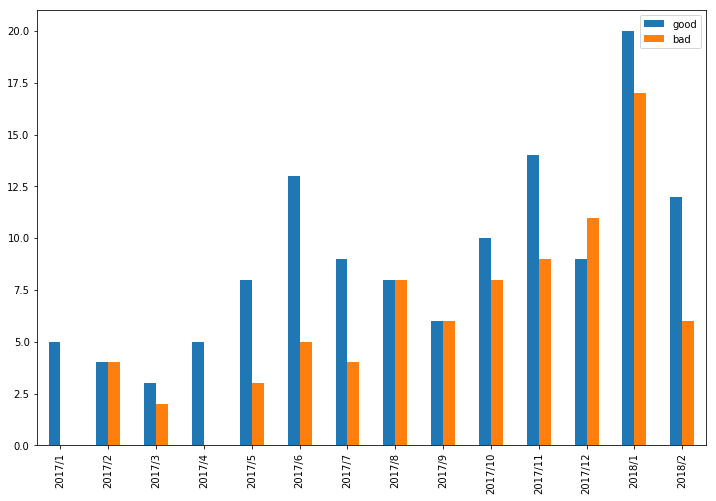

In [43]:
fig4 = plt.figure()

fig4axes1 = keyword_table.plot(kind='bar',figsize = (12,8))

plt.show()

In [95]:
sy_cut = [exponential_smoothing(price[100:],float(e)) for e in sx] 

sz_cut = [SSE(price[100:],e) for e in sy_cut] 

In [96]:
sz_cut

[373909.9298991912,
 349584.96916761727,
 329984.3494168488,
 314019.436010754,
 300939.3860476181,
 290214.35450453137,
 281464.5688704569,
 274416.13809401955,
 268872.7158961652,
 264696.7267945712,
 261796.48634808918,
 260117.066698146,
 259633.64655542403,
 260346.61726385175,
 262278.0670711536,
 265469.5580520067]

In [97]:
tmp1 = (sy_cut[-4][-1]-price[-1])/price[-1]*100

In [98]:
tmp1 - (sy[-4][-1]-price[-1])/price[-1]*100

0.0

In [1]:
from datetime import datetime

In [2]:
str(datetime.now())

'2018-02-26 10:40:02.040184'